# Парсим подписчиков бота и друзей подписчиков с глубиной 3

In [1]:
import requests
import time
from tqdm.notebook import tqdm
from datetime import datetime
import pandas as pd

In [4]:
seen = pd.read_csv('jasha_lava_seen.csv')

In [5]:
seel_l = list(seen.unique_id)

In [3]:
def get_followers(yasha_lava, seen_list):
    TOKEN = ''
    start = datetime.now()
    edges = []
    data = requests.get(
    'https://api.vk.com/method/users.getFollowers', 
    params={
        "user_id": yasha_lava,
        "v":"5.92",
        "offset": 300,
        "count": 300,
        "access_token": TOKEN
    }
    ).json()
    time.sleep(1)
    for user_id in tqdm(data['response']['items']):
        if user_id not in seen_list:
            edges.append([yasha_lava, user_id])
            data_2 = requests.get(
            'https://api.vk.com/method/friends.get', 
            params={
                "user_id": user_id,
                "v":"5.92",
                "access_token": TOKEN
            }
            ).json()
            time.sleep(1)
            seen_list.append(user_id)
            if 'error' not in data_2.keys():
                for user_id_2 in tqdm(data_2['response']['items']):
                    edges.append([user_id, user_id_2])
                    if user_id_2 not in seen_list:
                        data_3 = requests.get(
                        'https://api.vk.com/method/friends.get', 
                        params={
                            "user_id": user_id_2,
                            "v":"5.92",
                            "access_token": TOKEN
                        }
                        ).json()
                        time.sleep(2)
                        seen_list.append(user_id_2)
                        if 'error' not in data_3.keys():
                            for user_id_3 in data_3['response']['items']:
                                edges.append([user_id_2, user_id_3])
                        
    
    end = datetime.now()
    print('Затраченное время: ', (end - start))
    return edges, seen_list

In [7]:
edges, seen_list = get_followers(656481023, seel_l)



Затраченное время:  0:22:12.113315


In [12]:
df_seen = pd.DataFrame()

In [13]:
df_seen['unique_id'] = seen_list

In [14]:
df_seen.to_csv('jasha_lava_seen_2.csv')

In [15]:
df_edges = pd.DataFrame()

In [16]:
df_edges['edge'] = edges

In [17]:
df_edges.to_csv('jasha_lava_edges_2.csv')

In [2]:
df1 = pd.read_csv('jasha_lava_edges.csv')

In [3]:
df2 = pd.read_csv('jasha_lava_edges_2.csv')

In [4]:
df_final = pd.concat([df1, df2], ignore_index=True)

In [6]:
df_final = pd.read_csv('jasha_lava_concat.csv')

In [7]:
import ast
from tqdm.notebook import tqdm

In [8]:
list_edges = list(df_final.edge)

In [9]:
list_edges_2 = []
for e in tqdm(list_edges):
    x = ast.literal_eval(e)
    list_edges_2.append(x)

In [9]:
df_final.to_csv('jasha_lava_concat.csv')

In [11]:
list_edges_2[:10]

[[656481023, 380248552],
 [380248552, 327129],
 [327129, 1687],
 [327129, 6168],
 [327129, 13385],
 [327129, 13388],
 [327129, 16217],
 [327129, 16955],
 [327129, 18239],
 [327129, 20580]]

In [12]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install pygraph

Note: you may need to restart the kernel to use updated packages.


In [3]:
import itertools
from graphviz import Digraph

In [4]:
seen = pd.read_csv('jasha_lava_seen.csv')

In [5]:
unique_ids = list(seen.unique_id)

In [22]:
def graph(nodes_for_graph, edges):
    dot = Digraph()
    for n in nodes_for_graph:
        dot.node(str(n))
    
    for ed in edges:
        dot.edge(str(ed[0]), str(ed[1]))
        
    dot.render('yasha_graph.gv.dot')
    return dot

In [ ]:
graph(unique_ids, list_edges_2)

In [10]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


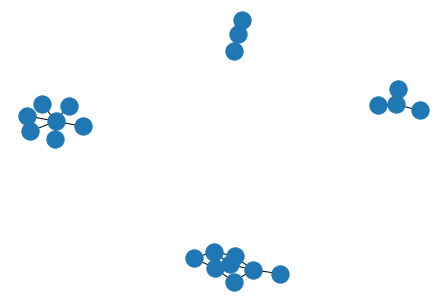

In [11]:
import networkx

graph = {
    '1': ['2', '3', '4'],
    '2': ['5','11','12','13','14','15'],
    '3': ['6','7','66','77'],
    '5': ['6', '8','66','77'],
    '4': ['7','66','77'],
    '7': ['9', '10']
}

g = networkx.Graph()

for k, vs in graph.items():
    server_id = 'server_%s' % k

    for v in vs:
        g.add_edge(server_id,v)

networkx.draw_spring(g)

In [12]:
from collections import defaultdict

d=defaultdict(list)
for row in tqdm(list_edges_2[:10000]):
    d[row[0]].append(row[1])
    d[row[1]].append(row[0])

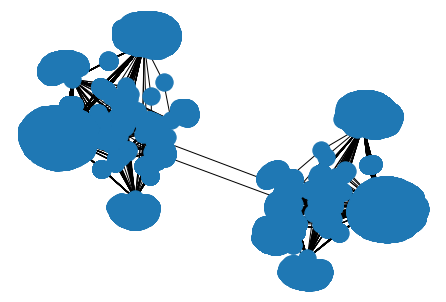

In [13]:
import networkx

g = networkx.Graph()

for k, vs in tqdm(d.items()):
    server_id = 'server_%s' % k

    for v in vs:
        g.add_edge(server_id,v)

networkx.draw_spring(g)

In [ ]:
import networkx
import matplotlib.pyplot as plt


g = networkx.Graph()

for k, vs in tqdm(d.items()):
    server_id = 'server_%s' % k

    for v in vs:
        g.add_edge(server_id,v)

networkx.draw_spring(g, with_labels=True)
plt.savefig('graph_yasha_10k.png', dpi=300, bbox_inches='tight')